# FLIGHT DELAY PREDICTION

In [1]:
# IMPORTING PANDAS AND NUMPY

import pandas as pd
import numpy as np

In [2]:
# IMPORTING THE CSV FILE:
data_raw=pd.read_csv('flights.csv',low_memory=False)
data_raw.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#FIRST 1 LAC VALUES FOR MODELLING:

data = data_raw.head(100000)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#COUNT OF NUMBER OF FLIGHTS DIVERTED 1 - 'DIVERTED' AND 0-'NOT DIVERTED':

data['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

In [105]:
#COR.RELATION BETWEEN ALL VARIABLES:

data.corr().head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,...,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,...,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,...,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246


In [106]:
#PACKAGES FOR DATA VISUALIZATION:

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

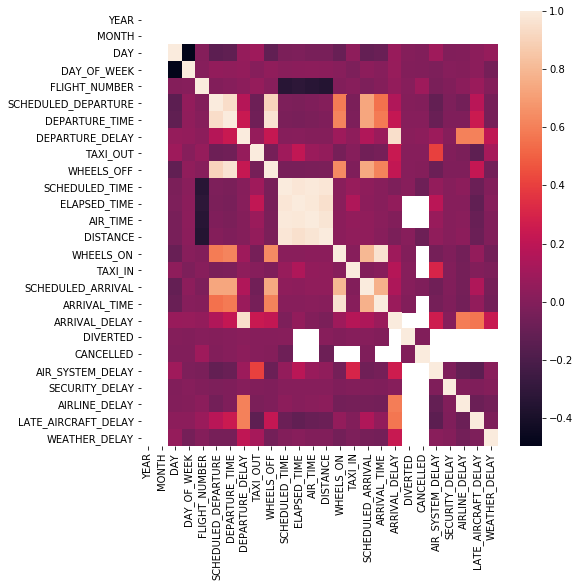

In [107]:
#HEATMAP OF CORR. :

rcParams["figure.figsize"]=[8,8]
sb.heatmap(data.corr())

In [108]:
# FEATURE ELIMINATION :

data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1,inplace=True)

C:\Users\R BASKARAN\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
#FILLNA USING COLUMNS MEAN

data.fillna(data.mean(),inplace=True)

C:\Users\R BASKARAN\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [110]:
data.head(5)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,169.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10,-8.0,263.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20,-2.0,266.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20,-5.0,258.0,805,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25,-1.0,199.0,320,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971


In [111]:
#CHECKING FOR NAN VALUES:

data.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
AIR_TIME               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [112]:
#FEATURE GENERATION FROM ARRIVAL_DELAY, USING IF ELSE STATEMENT:

data['RESULT']=data['ARRIVAL_DELAY'].apply(lambda x: 1 if x>15 else 0)

C:\Users\R BASKARAN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
data.head(10)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,1,1,ANC,SEA,5,-11.0,169.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,263.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,266.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,258.0,805,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,199.0,320,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
5,1,1,SFO,MSP,25,-5.0,206.0,602,8.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
6,1,1,LAS,MSP,25,-6.0,154.0,526,-17.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
7,1,1,LAX,CLT,30,14.0,228.0,803,-10.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
8,1,1,SFO,DFW,30,-11.0,173.0,545,-13.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
9,1,1,LAS,ATL,30,3.0,186.0,711,-15.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [114]:
data['RESULT'].value_counts() #COUNT OF NEWLY GENERATED FEATURE......

0    63779
1    36221
Name: RESULT, dtype: int64

In [115]:
data.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
AIR_TIME               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
RESULT                 0
dtype: int64

In [116]:
#IMORTING PACKAGES.....

from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [117]:
#DEFINING X AND y FOR THE MODEL:

X = data.drop(['AIR_TIME','ARRIVAL_DELAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1)
X_NEW = X.iloc[:,:-1]
y = data.RESULT

In [126]:
#SCALING ALL THE FEATURES USING 'SCALE':

X_scaled = pd.DataFrame(scale(X_NEW),columns=[])
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,-1.505849,-2.698084,-0.682748,-2.106808,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
1,0.0,-1.505849,-2.687718,-0.616543,-1.465415,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
2,0.0,-1.505849,-2.666985,-0.484132,-1.353171,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
3,0.0,-1.505849,-2.666985,-0.550338,-1.355175,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
4,0.0,-1.505849,-2.656618,-0.462064,-2.327287,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.798964,-0.411235,-0.572406,-0.525372,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
99996,0.0,1.798964,-0.411235,-0.241379,0.723340,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
99997,0.0,1.798964,-0.411235,-0.594475,-0.513346,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0
99998,0.0,1.798964,-0.409162,-0.285516,-0.054349,-0.047382,-0.156444,2.325287e-16,0.0,1.387099e-16,1.417522e-16,0.0


In [127]:
#SPLITTING INTO TRAIN AND TEST, TEST SAMPLE=30%

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.3)

In [128]:
#DECISION TREE CLASSIFIER:

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

In [129]:
#USING ROC AUC SCORE AS METRIC TO EVALUATE THE MODEL:

from sklearn.metrics import roc_auc_score

# MODEL METRIC SCORE:

In [133]:
roc_auc_score(y_test,y_predict)

0.99814856509465